In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [5]:
# Importing the dataset
Tdata_train = pd.read_csv('/content/drive/MyDrive/Code/Python/IDSS/Hackatons/Trains/Traveldata_train.csv')

Tdata_test = pd.read_csv('/content/drive/MyDrive/Code/Python/IDSS/Hackatons/Trains/Traveldata_test.csv')

# Check the top five records of the data
print(Tdata_train.head())

print(Tdata_test.head())

         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0  
         ID  Gender      Customer_Type   Age      Type_Travel Travel_Class  \
0  99900001  Female                NaN  36.0  Business Tr

In [6]:
print(Tdata_train.info())
print(Tdata_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID        

In [7]:
display(Tdata_train.describe().T)
display(Tdata_test.describe().T)

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


,count,mean,std,min,25%,50%,75%,max
ID,35602.0,9.991780e+07,10277.556478,99900001.0,99908901.25,99917801.5,99926701.75,99935602.0
Age,35591.0,3.944700e+01,15.137554,7.0,27.00,40.0,51.00,85.0
Travel_Distance,35602.0,1.987152e+03,1024.308863,50.0,1360.00,1929.0,2559.00,6868.0
Departure_Delay_in_Mins,35573.0,1.488070e+01,37.895453,0.0,0.00,0.0,13.00,978.0
Arrival_Delay_in_Mins,35479.0,1.530880e+01,38.531293,0.0,0.00,0.0,13.00,970.0


In [8]:
print(Tdata_train.isna().sum())
print(Tdata_test.isna().sum())

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64
ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64


In [9]:
# Importing the dataset
Sdata_train = pd.read_csv('/content/drive/MyDrive/Code/Python/IDSS/Hackatons/Trains/Surveydata_train.csv')

Sdata_test = pd.read_csv('/content/drive/MyDrive/Code/Python/IDSS/Hackatons/Trains/Surveydata_test.csv')

# Check the top five records of the data
display(Sdata_train.head())

display(Sdata_test.head())

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [10]:
display(Sdata_train.info())

display(Sdata_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

None

In [11]:
display(Sdata_train.describe(include='all'))
display(Sdata_test.describe(include='all'))

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,9.437900e+04,94379.000000,94318,94379,85449,85638,94349,94349,94361,94288,94306,86778,94289,94237,94302,94373,94373
unique,NaN,NaN,6,2,6,6,6,6,6,6,6,6,6,5,6,6,6
top,NaN,NaN,Acceptable,Green Car,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,NaN,NaN,21158,47435,19574,18468,24173,22835,30446,30016,28909,27265,28870,34944,26502,35427,25533
mean,9.884719e+07,0.546658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.724501e+04,0.497821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.880000e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.882360e+07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.884719e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.887078e+07,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
count,3.560200e+04,35580,35602,32277,32245,35590,35590,35594,35576,35584,32730,35577,35562,35580,35600,35600
unique,NaN,6,2,6,6,5,6,6,5,6,5,6,5,5,5,6
top,NaN,Acceptable,Ordinary,Good,Acceptable,Manageable,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good
freq,NaN,8003,17860,7361,7133,9364,8743,11436,11487,11025,10222,10842,13291,9982,13421,9680
mean,9.991780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.027756e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.990000e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.990890e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.991780e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.992670e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
display(Sdata_train.isna().sum())
display(Sdata_test.isna().sum())

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

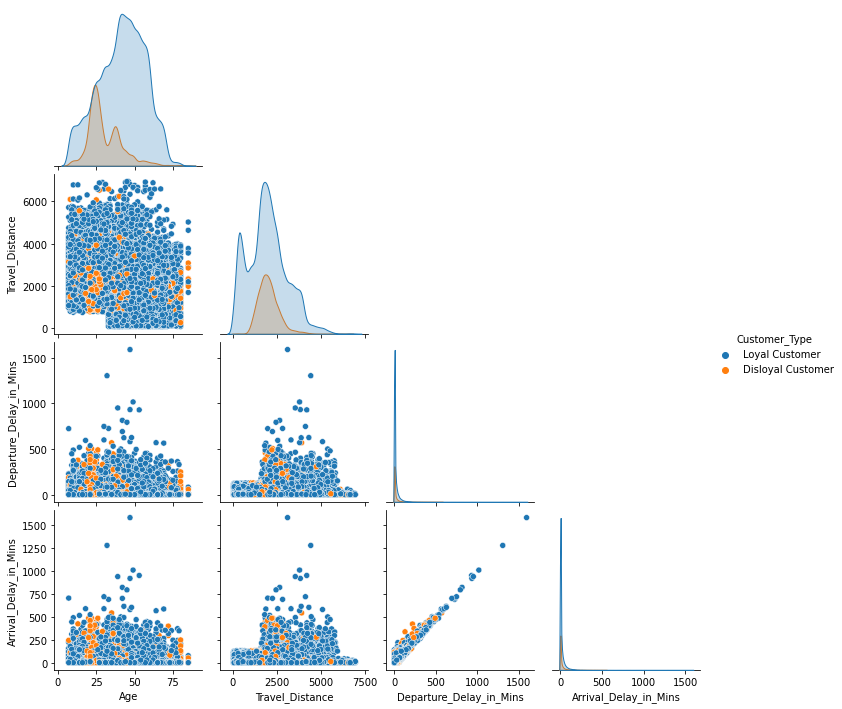

In [13]:
sns.pairplot( Tdata_train.iloc[:,1:], corner='True' , hue='Customer_Type')
plt.show()

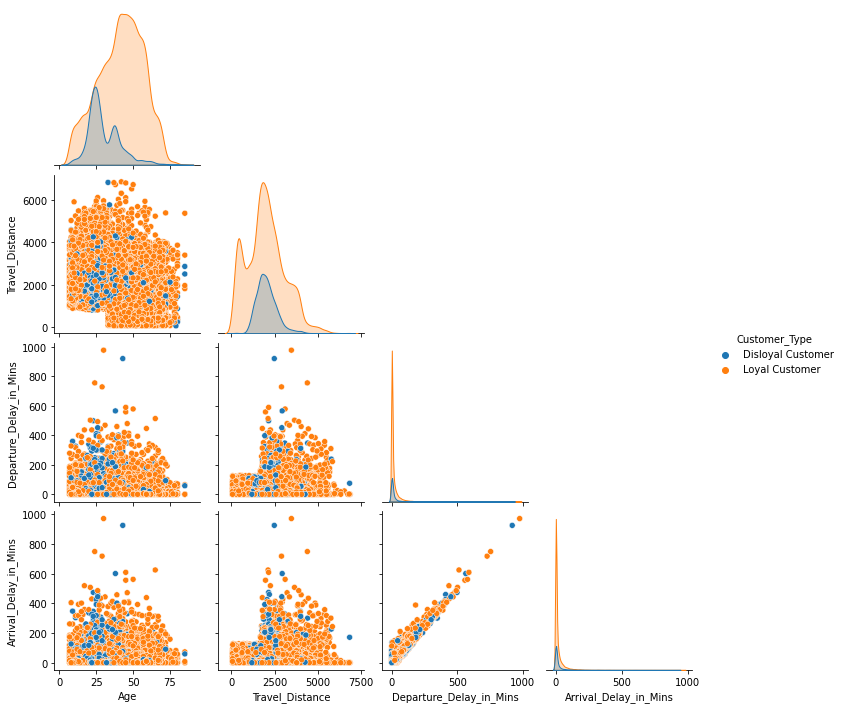

In [14]:
sns.pairplot( Tdata_test.iloc[:,1:], corner='True' , hue='Customer_Type')
plt.show()

In [15]:
#merging the two datasets

merged_df = pd.merge(Sdata_train, Tdata_train, on= 'ID')
display(merged_df.head())

merged_df_test = pd.merge(Sdata_test, Tdata_test, on= 'ID')
display(merged_df_test.head())

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,...,Excellent,Poor,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,...,Excellent,Acceptable,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,...,Needs Improvement,Excellent,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,...,Excellent,Poor,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,...,Excellent,Excellent,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [16]:
display(merged_df.info())
display(merged_df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Seat_Comfort             35580 non-null  object 
 2   Seat_Class               35602 non-null  object 
 3   Arrival_Time_Convenient  32277 non-null  object 
 4   Catering                 32245 non-null  object 
 5   Platform_Location        35590 non-null  object 
 6   Onboard_Wifi_Service     35590 non-null  object 
 7   Onboard_Entertainment    35594 non-null  object 
 8   Online_Support           35576 non-null  object 
 9   Ease_of_Online_Booking   35584 non-null  object 
 10  Onboard_Service          32730 non-null  object 
 11  Legroom                  35577 non-null  object 
 12  Baggage_Handling         35562 non-null  object 
 13  CheckIn_Service          35580 non-null  object 
 14  Cleanliness           

None

In [17]:
# Creating numerical columns
num_cols=['Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']

# Creating categorical variables 
cat_cols= ['Overall_Experience','Seat_Comfort','Seat_Class', 'Arrival_Time_Convenient','Catering', 'Platform_Location','Onboard_Wifi_Service','Onboard_Entertainment','Online_Support',
           'Ease_of_Online_Booking','Onboard_Service', 'Legroom', 'Baggage_Handling','CheckIn_Service', 'Cleanliness', 'Online_Boarding','Gender','Customer_Type','Type_Travel','Travel_Class']

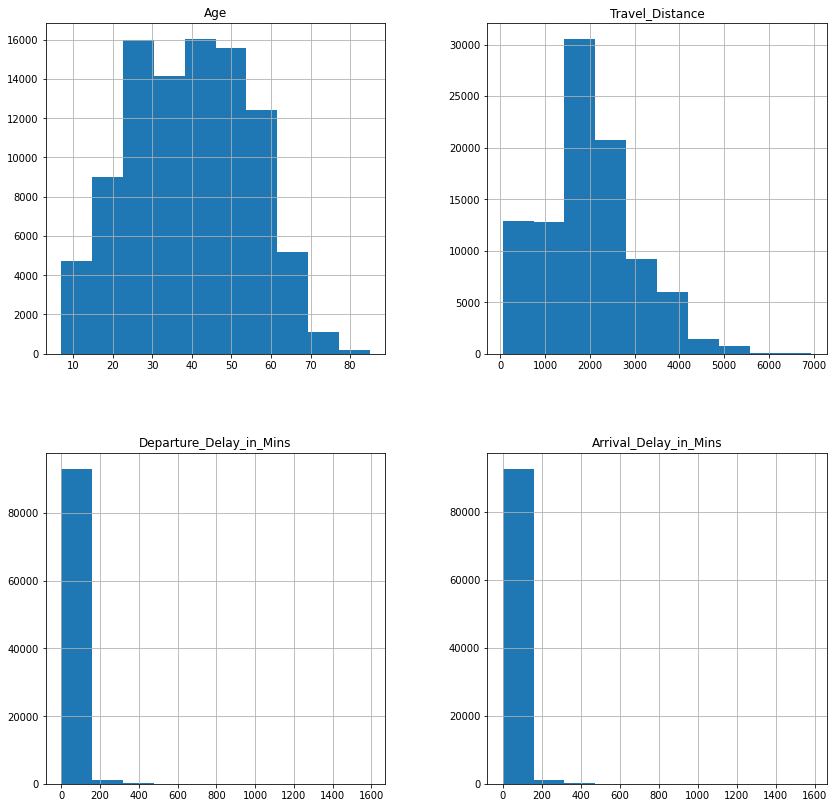

In [18]:
# Creating histograms
merged_df[num_cols].hist(figsize=(14,14))
plt.show()

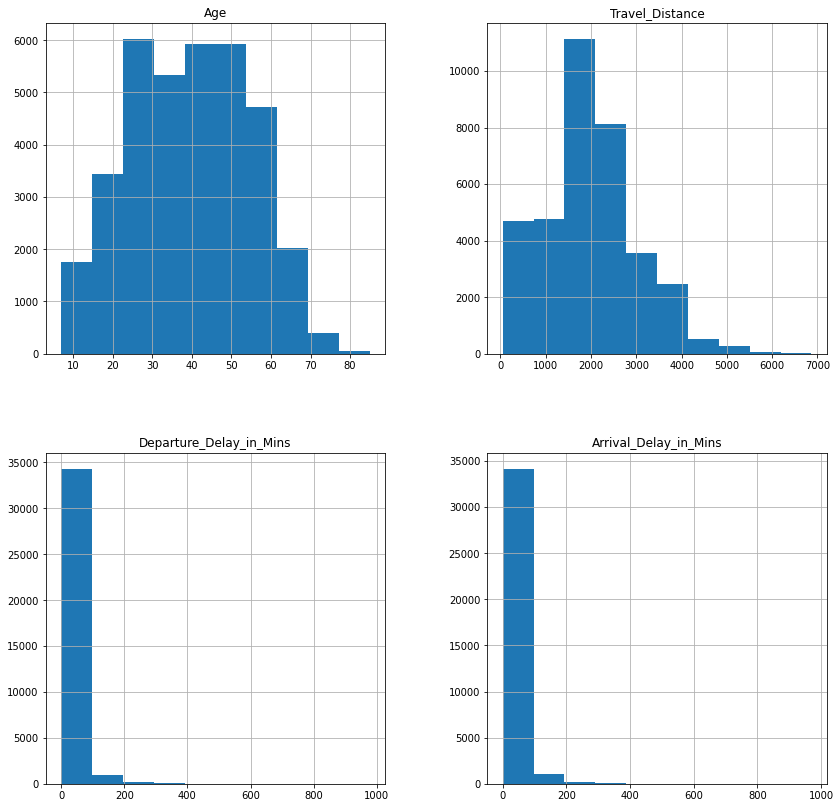

In [19]:
# Creating histograms
merged_df_test[num_cols].hist(figsize=(14,14))
plt.show()

In [20]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(merged_df[i].value_counts(normalize=True))
    print('*'*40)

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64
****************************************
Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64
****************************************
Green Car    0.502601
Ordinary     0.497399
Name: Seat_Class, dtype: float64
****************************************
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: Arrival_Time_Convenient, dtype: float64
****************************************
Acceptable           0.215652
Needs Improvement    0.209930
Good                 0.209825
Poor                 0.161821
Excellent            0.157115
Extremely Poor       0.045657
Name: Catering, dtype: float64
**************************************

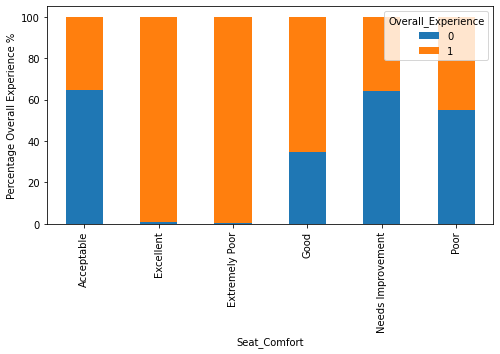

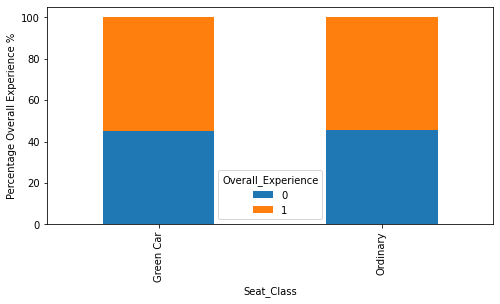

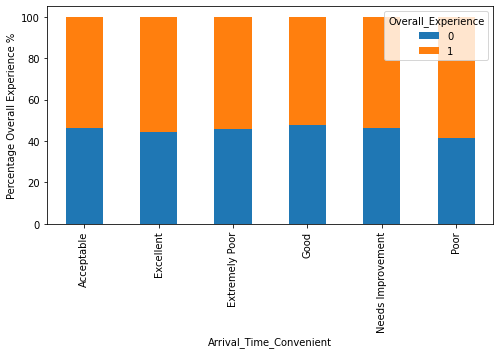

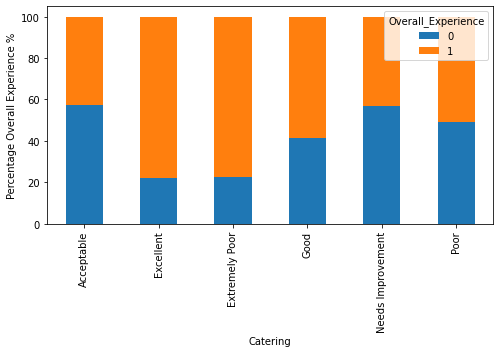

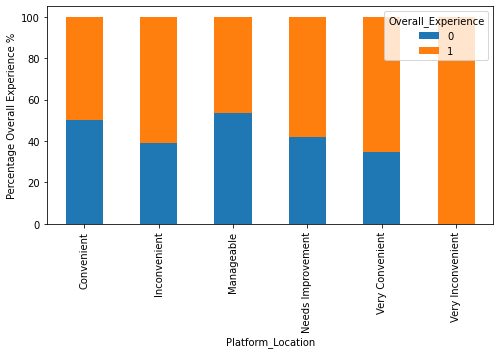

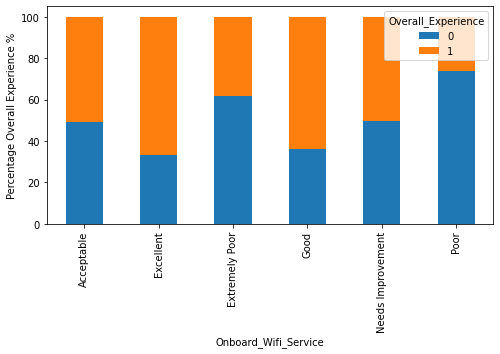

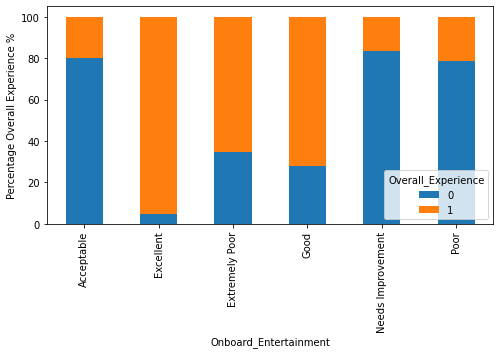

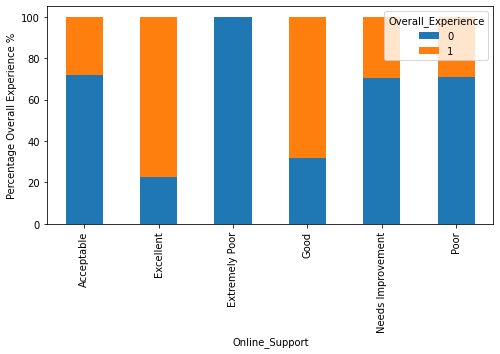

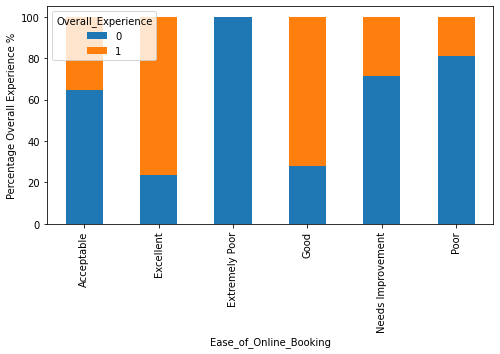

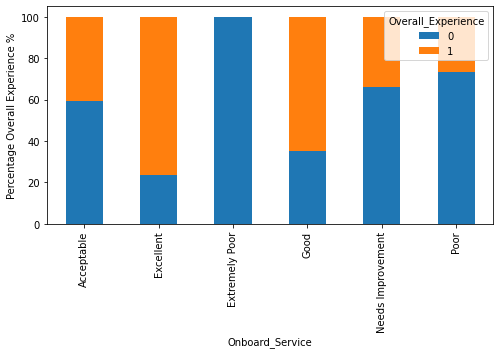

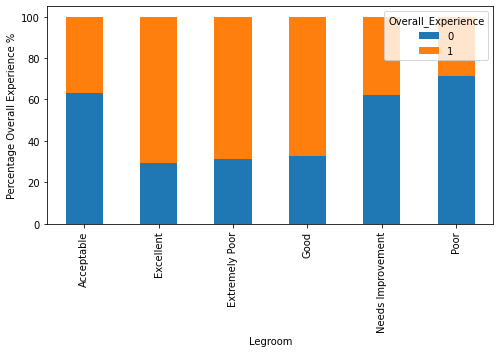

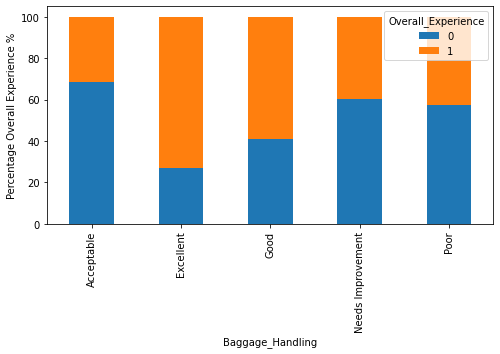

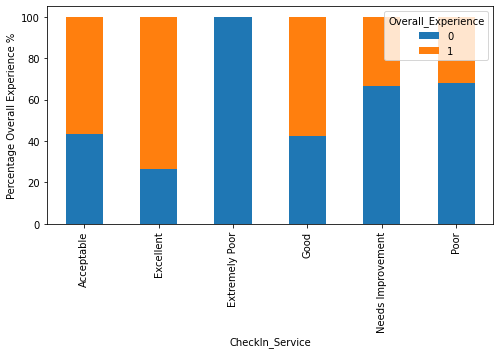

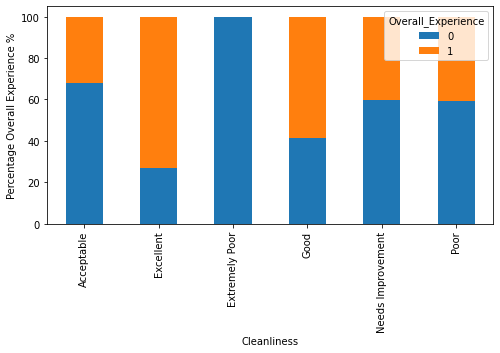

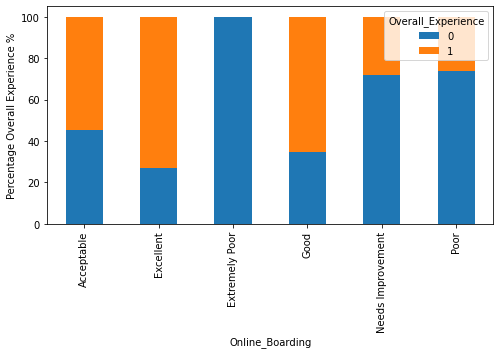

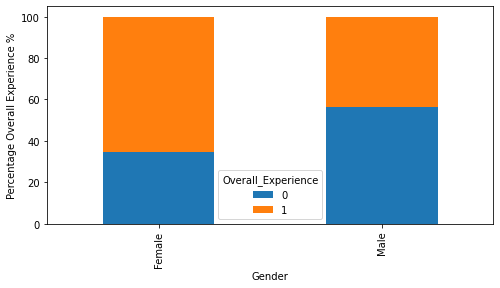

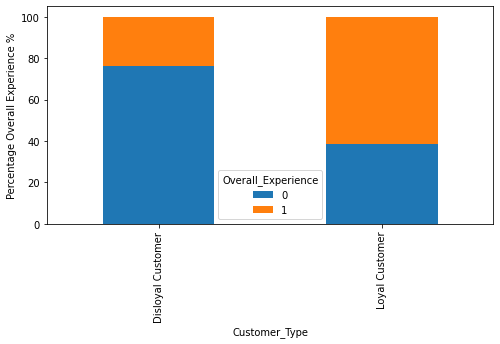

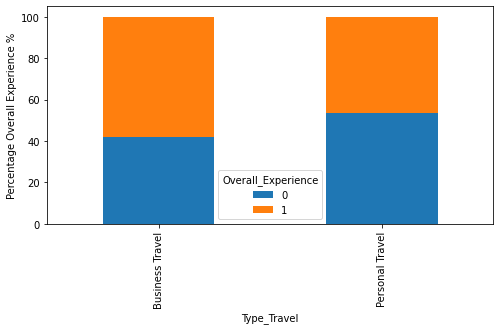

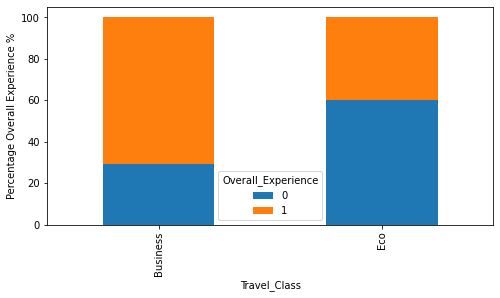

In [21]:
for i in cat_cols:
    if i!='Overall_Experience':
        (pd.crosstab(merged_df[i],merged_df['Overall_Experience'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Overall Experience %')

In [22]:
# Mean of numerical variables grouped by overall_experience
merged_df.groupby(['Overall_Experience'])[num_cols].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Overall_Experience,,,,
0,37.49018,2025.826088,17.738600,18.392374
1,41.01968,1939.962650,12.083107,12.196763


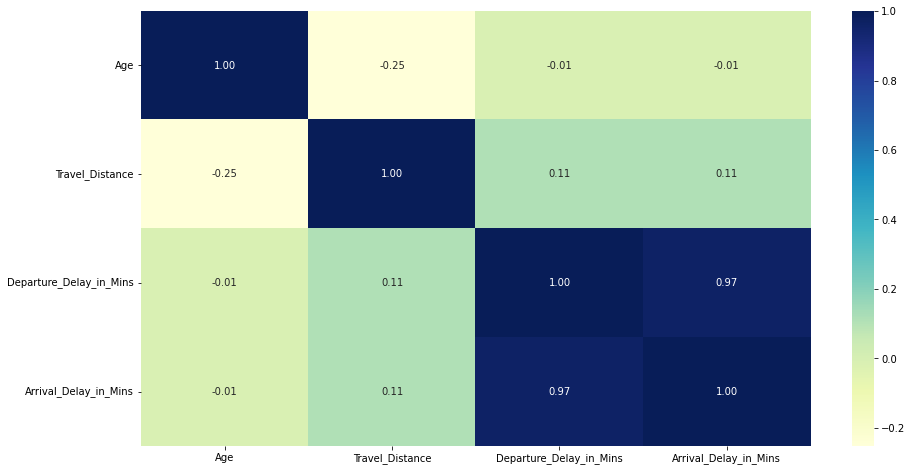

In [23]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(merged_df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [24]:
merged_df[merged_df.Seat_Comfort.isna()]

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
560,98800561,0,NaN,Green Car,NaN,Good,Needs Improvement,Good,Good,Good,...,Acceptable,Good,Male,Loyal Customer,30.0,Business Travel,Eco,1495,0.0,0.0
2214,98802215,1,NaN,Green Car,NaN,Poor,Manageable,Good,Good,Good,...,Excellent,Good,Male,Loyal Customer,30.0,NaN,Business,4725,86.0,77.0
4754,98804755,0,NaN,Ordinary,NaN,Needs Improvement,Manageable,Excellent,Needs Improvement,Poor,...,Good,Excellent,Male,Loyal Customer,63.0,Personal Travel,Eco,1380,0.0,0.0
5191,98805192,1,NaN,Green Car,NaN,Acceptable,Manageable,Good,Good,Good,...,Acceptable,Good,Male,NaN,33.0,Business Travel,Business,1436,6.0,25.0
8809,98808810,1,NaN,Green Car,NaN,Acceptable,Manageable,Good,Good,Good,...,Needs Improvement,Good,Female,Loyal Customer,12.0,Personal Travel,Eco,3114,41.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86883,98886884,0,NaN,Green Car,NaN,Acceptable,Manageable,Needs Improvement,Acceptable,Needs Improvement,...,Good,Needs Improvement,Male,Loyal Customer,13.0,Personal Travel,Eco,2188,4.0,0.0
87693,98887694,0,NaN,Green Car,NaN,Excellent,Very Convenient,Needs Improvement,Needs Improvement,Needs Improvement,...,Acceptable,Needs Improvement,Female,Loyal Customer,40.0,Business Travel,Eco,2361,0.0,0.0
88765,98888766,0,NaN,Green Car,NaN,Acceptable,Convenient,Needs Improvement,Acceptable,Poor,...,Acceptable,Needs Improvement,Female,Disloyal Customer,49.0,Business Travel,Eco,1788,22.0,18.0
90800,98890801,0,NaN,Ordinary,NaN,Excellent,Needs Improvement,Acceptable,Acceptable,Acceptable,...,Good,Acceptable,Male,Loyal Customer,37.0,Business Travel,Eco,1528,76.0,56.0


In [25]:
print(merged_df.groupby(['Seat_Class','Seat_Comfort']).count()['ID'])
print(merged_df_test.groupby(['Seat_Class','Seat_Comfort']).count()['ID'])

Seat_Class  Seat_Comfort     
Green Car   Acceptable           10604
            Excellent             6597
            Extremely Poor        1733
            Good                 10395
            Needs Improvement    10513
            Poor                  7563
Ordinary    Acceptable           10554
            Excellent             6374
            Extremely Poor        1730
            Good                 10200
            Needs Improvement    10433
            Poor                  7622
Name: ID, dtype: int64
Seat_Class  Seat_Comfort     
Green Car   Acceptable           3957
            Excellent            2367
            Extremely Poor        648
            Good                 3920
            Needs Improvement    3942
            Poor                 2896
Ordinary    Acceptable           4046
            Excellent            2487
            Extremely Poor        681
            Good                 3888
            Needs Improvement    3889
            Poor               

In [26]:
merged_df.Seat_Comfort.fillna('Acceptable',inplace=True)
print(merged_df.Seat_Comfort.isna().sum())
merged_df_test.Seat_Comfort.fillna('Acceptable',inplace=True)
print(merged_df_test.Seat_Comfort.isna().sum())

0
0


In [27]:
print(merged_df.groupby('Arrival_Time_Convenient').mean()['Arrival_Delay_in_Mins'])
print(merged_df.Arrival_Time_Convenient.value_counts(normalize=True))

print(merged_df_test.groupby('Arrival_Time_Convenient').mean()['Arrival_Delay_in_Mins'])
print(merged_df_test.Arrival_Time_Convenient.value_counts(normalize=True))

Arrival_Time_Convenient
Acceptable           15.283059
Excellent            14.551372
Extremely Poor       12.960593
Good                 15.046130
Needs Improvement    15.595622
Poor                 15.340761
Name: Arrival_Delay_in_Mins, dtype: float64
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: Arrival_Time_Convenient, dtype: float64
Arrival_Time_Convenient
Acceptable           15.711809
Excellent            15.702209
Extremely Poor       12.568510
Good                 15.440278
Needs Improvement    15.620385
Poor                 14.699961
Name: Arrival_Delay_in_Mins, dtype: float64
Good                 0.228057
Excellent            0.204139
Acceptable           0.181058
Needs Improvement    0.176101
Poor                 0.158968
Extremely Poor       0.051678
Name: Arrival_Time_Convenient, dtype: float64


In [28]:
merged_df['Arrival_Time_Convenient'].fillna('Good', inplace = True)
display(merged_df['Arrival_Time_Convenient'].isna().sum()) #imputing 'Good' value for 'NaN'

merged_df_test['Arrival_Time_Convenient'].fillna('Good', inplace = True)
display(merged_df_test['Arrival_Time_Convenient'].isna().sum())

0

0

In [29]:
print(merged_df.isna().sum())

print(merged_df_test.isna().sum())

ID                            0
Overall_Experience            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64
ID                            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                   3357
Platform_Location          

In [30]:
#filling na with most freq values
for i in range (5,19):
  merged_df.iloc[:,i].fillna(merged_df.iloc[:,i].value_counts().index[0],inplace=True)

In [31]:
#filling na with most freq values
for i in range (4,18):
  merged_df_test.iloc[:,i].fillna(merged_df_test.iloc[:,i].value_counts().index[0],inplace=True)

In [32]:
print(merged_df.isna().sum())

print(merged_df_test.isna().sum())

ID                            0
Overall_Experience            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location             0
Onboard_Wifi_Service          0
Onboard_Entertainment         0
Online_Support                0
Ease_of_Online_Booking        0
Onboard_Service               0
Legroom                       0
Baggage_Handling              0
CheckIn_Service               0
Cleanliness                   0
Online_Boarding               0
Gender                        0
Customer_Type                 0
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64
ID                            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location          

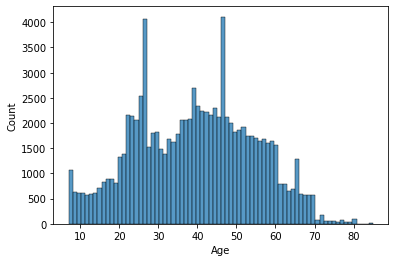

In [33]:
sns.histplot(merged_df.Age)

In [34]:
merged_df.groupby('Customer_Type').mean()['Age']

Customer_Type
Disloyal Customer    30.415566
Loyal Customer       41.203129
Name: Age, dtype: float64

In [35]:
merged_df['Age'] = pd.cut(merged_df['Age'], 5, labels = ['25', '35', '45', '60', '80'])
merged_df_test['Age'] = pd.cut(merged_df_test['Age'], 5, labels = ['25', '35', '45', '60', '80'])

print(merged_df['Age'].unique())
print(merged_df['Age'].unique())

['45', '60', '25', '35', '80', NaN]
Categories (5, object): ['25' < '35' < '45' < '60' < '80']
['45', '60', '25', '35', '80', NaN]
Categories (5, object): ['25' < '35' < '45' < '60' < '80']


In [36]:
np.where(merged_df['Customer_Type'] == 'Loyal Customer', merged_df['Age'], merged_df['Age'].fillna('35', inplace = True))
np.where(merged_df['Customer_Type'] == 'Disloyal Customer', merged_df['Age'], merged_df['Age'].fillna('25', inplace = True))

array([None, None, None, ..., None, None, None], dtype=object)

In [37]:
np.where(merged_df_test['Customer_Type'] == 'Loyal Customer', merged_df_test['Age'], merged_df_test['Age'].fillna('35', inplace = True))
np.where(merged_df_test['Customer_Type'] == 'Disloyal Customer', merged_df_test['Age'], merged_df_test['Age'].fillna('25', inplace = True))

array([None, '25', None, ..., '25', None, None], dtype=object)

In [38]:
display(merged_df.isna().sum())
display(merged_df_test.isna().sum())

ID                            0
Overall_Experience            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location             0
Onboard_Wifi_Service          0
Onboard_Entertainment         0
Online_Support                0
Ease_of_Online_Booking        0
Onboard_Service               0
Legroom                       0
Baggage_Handling              0
CheckIn_Service               0
Cleanliness                   0
Online_Boarding               0
Gender                        0
Customer_Type                 0
Age                           0
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

ID                            0
Seat_Comfort                  0
Seat_Class                    0
Arrival_Time_Convenient       0
Catering                      0
Platform_Location             0
Onboard_Wifi_Service          0
Onboard_Entertainment         0
Online_Support                0
Ease_of_Online_Booking        0
Onboard_Service               0
Legroom                       0
Baggage_Handling              0
CheckIn_Service               0
Cleanliness                   0
Online_Boarding               0
Gender                        0
Customer_Type                 0
Age                           0
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64

In [39]:
merged_df.groupby(['Travel_Class', 'Type_Travel']).count()['ID']

Travel_Class  Type_Travel    
Business      Business Travel    38849
              Personal Travel     1791
Eco           Business Travel    19768
              Personal Travel    24745
Name: ID, dtype: int64

In [40]:
np.where(merged_df['Travel_Class'] == 'Business', merged_df['Type_Travel'], merged_df['Type_Travel'].fillna('Business Travel', inplace = True))
np.where(merged_df['Travel_Class'] == 'Eco', merged_df['Type_Travel'], merged_df['Type_Travel'].fillna('Personal Travel', inplace = True))

np.where(merged_df_test['Travel_Class'] == 'Business', merged_df_test['Type_Travel'], merged_df_test['Type_Travel'].fillna('Business Travel', inplace = True))
np.where(merged_df_test['Travel_Class'] == 'Eco', merged_df_test['Type_Travel'], merged_df_test['Type_Travel'].fillna('Personal Travel', inplace = True))

array([None, None, None, ..., 'Business Travel', 'Personal Travel',
       'Personal Travel'], dtype=object)

In [41]:
merged_df['Departure_Delay_in_Mins'].fillna(merged_df['Departure_Delay_in_Mins'].mean(), inplace = True)
merged_df['Arrival_Delay_in_Mins'].fillna(merged_df['Arrival_Delay_in_Mins'].mean(), inplace = True)


merged_df_test['Departure_Delay_in_Mins'].fillna(merged_df_test['Departure_Delay_in_Mins'].mean(), inplace = True)
merged_df_test['Arrival_Delay_in_Mins'].fillna(merged_df_test['Arrival_Delay_in_Mins'].mean(), inplace = True)

In [42]:
print(merged_df.isna().sum())
print(merged_df_test.isna().sum())

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64
ID                         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
E

In [43]:
dict_ratings = {'Excellent': 5, 'Good': 4,'Acceptable':3, 'Needs Improvement':2,'Poor':1, 'Extremely Poor':0}

In [44]:
merged_df['Seat_Comfort'] = merged_df.Seat_Comfort.map(dict_ratings)
merged_df['Arrival_Time_Convenient'] = merged_df.Arrival_Time_Convenient.map(dict_ratings)
merged_df['Catering'] = merged_df.Catering.map(dict_ratings)
merged_df['Onboard_Wifi_Service'] = merged_df.Onboard_Wifi_Service.map(dict_ratings)
merged_df['Onboard_Entertainment'] = merged_df.Onboard_Entertainment.map(dict_ratings)
merged_df['Online_Support'] = merged_df.Online_Support.map(dict_ratings)
merged_df['Ease_of_Online_Booking'] = merged_df.Ease_of_Online_Booking.map(dict_ratings)
merged_df['Onboard_Service'] = merged_df.Onboard_Service.map(dict_ratings)
merged_df['Legroom'] = merged_df.Legroom.map(dict_ratings)
merged_df['Baggage_Handling'] = merged_df.Baggage_Handling.map(dict_ratings)
merged_df['CheckIn_Service'] = merged_df.CheckIn_Service.map(dict_ratings)
merged_df['Cleanliness'] = merged_df.Cleanliness.map(dict_ratings)
merged_df['Online_Boarding'] = merged_df.Online_Boarding.map(dict_ratings)



In [45]:
merged_df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,2,Green Car,5,5,Very Convenient,4,2,3,...,2,1,Female,Loyal Customer,45,Business Travel,Business,272,0.0,5.0
1,98800002,0,1,Ordinary,5,1,Needs Improvement,4,1,4,...,4,4,Male,Loyal Customer,45,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,2,Green Car,2,2,Needs Improvement,2,4,5,...,5,5,Female,Loyal Customer,45,Business Travel,Business,1061,77.0,119.0
3,98800004,0,3,Ordinary,2,3,Needs Improvement,3,2,3,...,3,3,Female,Loyal Customer,45,Business Travel,Business,780,13.0,18.0
4,98800005,1,3,Ordinary,3,3,Manageable,2,4,5,...,4,4,Female,Loyal Customer,45,Business Travel,Business,1981,0.0,0.0


In [46]:
merged_df_test['Seat_Comfort'] = merged_df_test.Seat_Comfort.map(dict_ratings)
merged_df_test['Arrival_Time_Convenient'] = merged_df_test.Arrival_Time_Convenient.map(dict_ratings)
merged_df_test['Catering'] = merged_df_test.Catering.map(dict_ratings)
merged_df_test['Onboard_Wifi_Service'] = merged_df_test.Onboard_Wifi_Service.map(dict_ratings)
merged_df_test['Onboard_Entertainment'] = merged_df_test.Onboard_Entertainment.map(dict_ratings)
merged_df_test['Online_Support'] = merged_df_test.Online_Support.map(dict_ratings)
merged_df_test['Ease_of_Online_Booking'] = merged_df_test.Ease_of_Online_Booking.map(dict_ratings)
merged_df_test['Onboard_Service'] = merged_df_test.Onboard_Service.map(dict_ratings)
merged_df_test['Legroom'] = merged_df_test.Legroom.map(dict_ratings)
merged_df_test['Baggage_Handling'] = merged_df_test.Baggage_Handling.map(dict_ratings)
merged_df_test['CheckIn_Service'] = merged_df_test.CheckIn_Service.map(dict_ratings)
merged_df_test['Cleanliness'] = merged_df_test.Cleanliness.map(dict_ratings)
merged_df_test['Online_Boarding'] = merged_df_test.Online_Boarding.map(dict_ratings)


In [47]:
print(merged_df.info())
print(merged_df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Overall_Experience       94379 non-null  int64   
 2   Seat_Comfort             94379 non-null  int64   
 3   Seat_Class               94379 non-null  object  
 4   Arrival_Time_Convenient  94379 non-null  int64   
 5   Catering                 94379 non-null  int64   
 6   Platform_Location        94379 non-null  object  
 7   Onboard_Wifi_Service     94379 non-null  int64   
 8   Onboard_Entertainment    94379 non-null  int64   
 9   Online_Support           94379 non-null  int64   
 10  Ease_of_Online_Booking   94379 non-null  int64   
 11  Onboard_Service          94379 non-null  int64   
 12  Legroom                  94379 non-null  int64   
 13  Baggage_Handling         94379 non-null  int64   
 14  CheckI

In [48]:
dict_Platform = {'Very Convenient': 5, 'Convenient': 4,'Manageable':3, 'Needs Improvement':2,'Inconvenient':1, 'Very Inconvenient':0}


In [49]:
merged_df['Platform_Location'] = merged_df.Platform_Location.map(dict_Platform)
merged_df_test['Platform_Location'] = merged_df_test.Platform_Location.map(dict_Platform)

In [50]:
merged_df['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
merged_df['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [0,1], inplace = True)
merged_df['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [0,1], inplace = True)
merged_df['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)


merged_df_test['Gender'].replace(['Female', 'Male'], [0,1], inplace = True)
merged_df_test['Customer_Type'].replace(['Loyal Customer', 'Disloyal Customer'], [0,1], inplace = True)
merged_df_test['Type_Travel'].replace(['Business Travel', 'Personal Travel'], [0,1], inplace = True)
merged_df_test['Travel_Class'].replace(['Business', 'Eco'], [0,1], inplace = True)

In [51]:
merged_df_test['Type_Travel'].unique()

array([0, 1])

In [52]:
merged_df['Seat_Class'].replace(['Green Car', 'Ordinary'], [0,1], inplace = True)
merged_df_test['Seat_Class'].replace(['Green Car', 'Ordinary'], [0,1], inplace = True)

In [53]:
print(merged_df.info())
print(merged_df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Overall_Experience       94379 non-null  int64   
 2   Seat_Comfort             94379 non-null  int64   
 3   Seat_Class               94379 non-null  int64   
 4   Arrival_Time_Convenient  94379 non-null  int64   
 5   Catering                 94379 non-null  int64   
 6   Platform_Location        94379 non-null  int64   
 7   Onboard_Wifi_Service     94379 non-null  int64   
 8   Onboard_Entertainment    94379 non-null  int64   
 9   Online_Support           94379 non-null  int64   
 10  Ease_of_Online_Booking   94379 non-null  int64   
 11  Onboard_Service          94379 non-null  int64   
 12  Legroom                  94379 non-null  int64   
 13  Baggage_Handling         94379 non-null  int64   
 14  CheckI

In [54]:
merged_df1=merged_df.copy()
merged_df_test1=merged_df_test.copy()

In [55]:
merged_df['Age'] = pd.Categorical(merged_df['Age'])

In [56]:
merged_df=pd.get_dummies(merged_df, prefix=['Age'])

In [57]:
merged_df_test['Age'] = pd.Categorical(merged_df_test['Age'])
merged_df_test=pd.get_dummies(merged_df_test, prefix=['Age'])

In [58]:
print(merged_df.info())
print(merged_df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94379 non-null  int64  
 3   Seat_Class               94379 non-null  int64  
 4   Arrival_Time_Convenient  94379 non-null  int64  
 5   Catering                 94379 non-null  int64  
 6   Platform_Location        94379 non-null  int64  
 7   Onboard_Wifi_Service     94379 non-null  int64  
 8   Onboard_Entertainment    94379 non-null  int64  
 9   Online_Support           94379 non-null  int64  
 10  Ease_of_Online_Booking   94379 non-null  int64  
 11  Onboard_Service          94379 non-null  int64  
 12  Legroom                  94379 non-null  int64  
 13  Baggage_Handling         94379 non-null  int64  
 14  CheckIn_Service       

In [59]:
merged_df.Arrival_Delay_in_Mins=merged_df.Arrival_Delay_in_Mins.astype(int)
merged_df.Departure_Delay_in_Mins=merged_df.Departure_Delay_in_Mins.astype(int)

merged_df_test.Arrival_Delay_in_Mins=merged_df_test.Arrival_Delay_in_Mins.astype(int)
merged_df_test.Departure_Delay_in_Mins=merged_df_test.Departure_Delay_in_Mins.astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


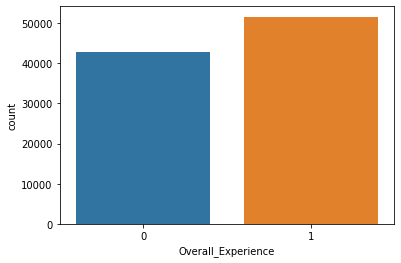

1    0.546658
0    0.453342
Name: Overall_Experience, dtype: float64

In [60]:
sns.countplot('Overall_Experience',data = merged_df)
plt.show()
merged_df.Overall_Experience.value_counts(normalize=True)

In [61]:
features = merged_df.drop(['ID', 'Overall_Experience', 'Departure_Delay_in_Mins'], axis=1)
target = merged_df['Overall_Experience']

In [62]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

In [63]:
scaler = MinMaxScaler()

# normalize data
X_train_normalized = scaler.fit_transform(X_train)


In [64]:
X_test_normalized = scaler.transform(X_test)

In [65]:
print(X_train_normalized)
print(X_test_normalized)

[[0.8 1.  0.4 ... 0.  0.  0. ]
 [1.  0.  1.  ... 1.  0.  0. ]
 [1.  0.  1.  ... 1.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.  0. ]
 [0.8 0.  0.8 ... 0.  0.  0. ]
 [0.6 1.  0.4 ... 1.  0.  0. ]]
[[0.4 1.  0.4 ... 0.  1.  0. ]
 [0.4 1.  0.6 ... 0.  0.  0. ]
 [0.4 1.  0.8 ... 0.  1.  0. ]
 ...
 [0.8 0.  0.8 ... 0.  0.  0. ]
 [1.  0.  0.6 ... 0.  0.  0. ]
 [1.  0.  0.8 ... 1.  0.  0. ]]


In [66]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(75503, 26)

(18876, 26)

(75503,)

(18876,)

In [67]:
display(X_test_normalized.shape)

(18876, 26)

Training Model********

In [68]:
#data scaling & fixing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from tensorflow.keras.layers import BatchNormalization

In [69]:
features = merged_df.drop(['ID', 'Overall_Experience', 'Departure_Delay_in_Mins'], axis=1)
target = merged_df['Overall_Experience']

features_test = merged_df_test.drop(['ID', 'Departure_Delay_in_Mins'], axis=1)


In [70]:
#merged_df_patch = pd.merge(Sdata_train, Tdata_train, on= 'ID')
#train_age_patch = merged_df_patch['Age']
#merged_df_test_patch = pd.merge(Sdata_test, Tdata_test, on= 'ID')
#train_age_patch_test = merged_df_test_patch['Age']
#features = features.drop(['Age_25', 'Age_35', 'Age_45', 'Age_60', 'Age_80'], axis = 1)
#features = features.join(train_age_patch)
#features_test = features_test.drop(['Age_25', 'Age_35', 'Age_45', 'Age_60', 'Age_80'], axis = 1)
#features_test = features_test.join(train_age_patch_test)

In [71]:
def get_outlier_list(features):
  features_outliers = features.select_dtypes(include = np.number)

  Q1, Q3 = lambda x: x.quantile(0.25), lambda y: y.quantile(0.75)
  IQR = lambda x: Q3(x) - Q1(x)
  lower, upper = lambda x : Q1(x) - 1.5 * IQR(x), lambda y: Q3(y) + 1.5 * IQR( y ) 
  loutlier, uoutlier = lambda x : x < lower(x) , lambda y : y > upper( y )

  colsl = features_outliers[loutlier(features_outliers)].count()/ len(features_outliers) * 100,
  colsu = features_outliers[uoutlier(features_outliers)].count()/ len(features_outliers) * 100

  cols_to_clean_upper = list(colsu[colsu > 0].index) 
  cols_to_clean_lower = list(colsl[0][colsl[0] > 0].index)

  print('cols to clean:' + str(list(cols_to_clean_upper)))
  print('cols to clean:' + str(list(cols_to_clean_lower)))

  outliersu = {}
  outliersl = {}

  for column in cols_to_clean_upper:
    outliersu[column] =  features_outliers[uoutlier(features_outliers)][column].dropna().index
  for column in cols_to_clean_lower:
    outliersl[column] =  features_outliers[uoutlier(features_outliers)][column].dropna().index


  return pd.DataFrame({'UpperIQR' : outliersu, 'LowerIQR' : outliersl})
  

In [72]:
outliers = get_outlier_list(features)

cols to clean:['Customer_Type', 'Travel_Distance', 'Arrival_Delay_in_Mins', 'Age_25', 'Age_60', 'Age_80']
cols to clean:['Onboard_Service', 'CheckIn_Service']


In [73]:
features_outliers = outliers['UpperIQR']

In [74]:
features.loc[features_outliers.Arrival_Delay_in_Mins, 'Arrival_Delay_in_Mins'] = np.nan
features.loc[features_outliers.Travel_Distance , 'Travel_Distance'] = np.nan


In [75]:
imputer_numerical = SimpleImputer(strategy = "median")
imputer_labels = ['Arrival_Delay_in_Mins', 'Travel_Distance']
features[imputer_labels] = imputer_numerical.fit_transform(features[imputer_labels])
features

,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,...,Customer_Type,Type_Travel,Travel_Class,Travel_Distance,Arrival_Delay_in_Mins,Age_25,Age_35,Age_45,Age_60,Age_80
0,2,0,5,5,5,4,2,3,2,2,...,0,0,0,272.0,5.0,0,0,1,0,0
1,1,1,5,1,2,4,1,4,4,5,...,0,1,1,2200.0,0.0,0,0,1,0,0
2,2,0,2,2,2,2,4,5,5,5,...,0,0,0,1061.0,0.0,0,0,1,0,0
3,3,1,2,3,2,3,2,3,3,3,...,0,0,0,780.0,18.0,0,0,1,0,0
4,3,1,3,3,3,2,4,5,4,4,...,0,0,0,1981.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,1,1,4,4,4,1,1,1,1,4,...,0,0,0,1357.0,0.0,0,1,0,0,0
94375,4,1,4,4,4,2,5,5,3,3,...,0,0,0,592.0,11.0,0,0,1,0,0
94376,2,0,2,2,2,4,5,4,4,4,...,0,0,0,2794.0,0.0,0,0,0,1,0
94377,2,1,4,2,4,4,2,4,4,3,...,0,1,1,2744.0,0.0,1,0,0,0,0


In [76]:
features['Travel_Distance'] = features['Travel_Distance'].apply(lambda x : np.sqrt(x))
features['Arrival_Delay_in_Mins'] = features['Arrival_Delay_in_Mins'].apply(lambda x : np.sqrt(x))
#sns.histplot(features['Travel_Distance'])
#sns.histplot(features['Arrival_Delay_in_Mins'])

In [77]:
df_test_normalized = scaler.transform(features_test)

In [78]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.1, random_state=42)

scaler = MinMaxScaler()

# normalize data
X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [ ]:
3# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(69)

import random
random.seed(69)

tf.random.set_seed(69)

# We will be adding the layers sequentially
model_5 = Sequential()

model_5.add(Dense(2048, activation='relu', input_shape=(26,)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_5.add(Dense(1028, activation='relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_5.add(Dense(512, activation='relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.15))

# Second hidden layer with 64 neurons and relu activation function
model_5.add(Dense(256, activation='relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.125))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_5.add(Dense(128, activation='relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.125))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_5.add(Dense(64, activation='relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.1))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_5.add(Dense(32, activation='relu'))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.08))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA  
model_5.add(Dense(1, activation='sigmoid'))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_steps = 10000,
    decay_rate = 0.9
)
opt = tf.keras.optimizers.Adamax(learning_rate = lr_schedule)

model_5.compile(loss = 'binary_crossentropy', optimizer= opt, metrics=['accuracy'])

model_5.summary()

history_5 = model_5.fit(X_train_normalized, 
                    y_train, 
                    validation_split=0.3, 
                    epochs=200,
                    verbose=2)

model_5.save('/content/drive/MyDrive/Code/Python/DL')

plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              55296     
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1028)              2106372   
                                                                 
 batch_normalization_1 (Batc  (None, 1028)             4112      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1028)              0

In [ ]:
df_test1 = merged_df_test.copy()
pred = np.round(model_5_1.predict(df_test_normalized))
df_test1['Overall_Experience'] = pred.astype(int)
sample = df_test1[['ID', 'Overall_Experience']]
sample.to_csv('sample_5_1.csv', index=False)
df_test1['Overall_Experience'].value_counts()